In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

In [2]:
data = pd.read_csv('../main/log/deep_mutation_impact_new.csv', names = ['dataset', 'algorithm', 'seed', 'operator', 'size',
                                                                   'nodes', 'depth', 'operation_index',
                                                                    'train_similarity', 'test_similarity',
                                                                   'train_distance', 'test_distance', 
                                                                   'train_variation', 'test_variation'])

In [3]:
data.tail()

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_similarity,test_similarity,train_distance,test_distance,train_variation,test_variation
3301825,ld50,SLIM*1NORM,29,deflate,1999,30015,2005,1994,1.000000,1.0,6.444861e+16,2.583536e+16,0.978723,1.0
3301826,ld50,SLIM*1NORM,29,deflate,1999,30015,2005,1995,0.999999,1.0,1.338816e+17,5.383033e+16,0.978723,1.0
3301827,ld50,SLIM*1NORM,29,deflate,1999,30015,2005,1996,1.000000,1.0,4.396635e+16,1.765464e+16,0.978723,1.0
3301828,ld50,SLIM*1NORM,29,deflate,1999,30015,2005,1997,1.000000,1.0,6.491331e+16,2.638802e+16,0.978723,1.0
3301829,ld50,SLIM*1NORM,29,deflate,1999,30015,2005,1998,1.000000,1.0,1.843836e+16,7.360282e+15,0.978723,1.0


In [4]:
data.drop_duplicates(subset = ['dataset', 'algorithm', 'seed', 'operator'], keep = 'last')

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_similarity,test_similarity,train_distance,test_distance,train_variation,test_variation
3242,yatch,SLIM+2SIG,0,inflate,2000,40422,2007,-1,1.000000,1.000000,3.493078e-01,1.825439e-01,1.000000,1.000000
5240,yatch,SLIM+2SIG,0,deflate,1999,40369,2006,1998,0.999998,0.999999,3.032988e+00,1.552540e+00,1.000000,1.000000
8483,airfoil,SLIM+2SIG,0,inflate,2000,45696,2007,-1,0.999995,0.999994,1.075267e+01,5.286959e+00,1.000000,1.000000
10481,airfoil,SLIM+2SIG,0,deflate,1999,45667,2006,1998,1.000000,1.000000,3.968689e-05,1.885976e-05,0.010806,0.023333
13724,concrete_slump,SLIM+2SIG,0,inflate,2000,36822,2007,-1,0.999994,0.999995,2.533054e-01,1.283816e-01,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291347,ppb,SLIM*1NORM,29,deflate,1999,30015,2005,1998,NaN,NaN,NaN,NaN,0.304762,0.384615
3294590,bioav,SLIM*1NORM,29,inflate,2000,30124,2006,-1,0.000000,0.000000,1.694108e-05,8.426149e-06,0.000000,0.000000
3296588,bioav,SLIM*1NORM,29,deflate,1999,30109,2005,1998,0.000000,0.000000,1.694108e-05,8.426149e-06,0.000000,0.000000
3299831,ld50,SLIM*1NORM,29,inflate,2000,30030,2006,-1,1.000000,1.000000,2.062620e+16,8.298068e+15,0.978723,1.000000


In [5]:
data.algorithm.unique()

array(['SLIM+2SIG', 'SLIM*1SIG', 'SLIM*1NORM'], dtype=object)

In [6]:
data.head()

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_similarity,test_similarity,train_distance,test_distance,train_variation,test_variation
0,yatch,SLIM+2SIG,0,inflate,2,48,9,-1,0.991601,0.993375,2.493179,1.035108,1.0,1.0
1,yatch,SLIM+2SIG,0,inflate,3,69,10,-1,0.970506,0.964283,5.240146,2.500263,1.0,1.0
2,yatch,SLIM+2SIG,0,inflate,4,94,11,-1,0.992006,0.992962,4.062109,2.206226,1.0,1.0
3,yatch,SLIM+2SIG,0,inflate,5,109,12,-1,0.999999,1.000000,0.029782,0.013818,1.0,1.0
4,yatch,SLIM+2SIG,0,inflate,6,128,13,-1,0.996691,0.997368,2.029124,1.049970,1.0,1.0


In [16]:
data.query("operator == 'deflate'")['size'].unique()

array([  49,  199,  999, 1999], dtype=int64)

In [7]:
data.tail()

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_similarity,test_similarity,train_distance,test_distance,train_variation,test_variation
3301825,ld50,SLIM*1NORM,29,deflate,1999,30015,2005,1994,1.000000,1.0,6.444861e+16,2.583536e+16,0.978723,1.0
3301826,ld50,SLIM*1NORM,29,deflate,1999,30015,2005,1995,0.999999,1.0,1.338816e+17,5.383033e+16,0.978723,1.0
3301827,ld50,SLIM*1NORM,29,deflate,1999,30015,2005,1996,1.000000,1.0,4.396635e+16,1.765464e+16,0.978723,1.0
3301828,ld50,SLIM*1NORM,29,deflate,1999,30015,2005,1997,1.000000,1.0,6.491331e+16,2.638802e+16,0.978723,1.0
3301829,ld50,SLIM*1NORM,29,deflate,1999,30015,2005,1998,1.000000,1.0,1.843836e+16,7.360282e+15,0.978723,1.0


yatch


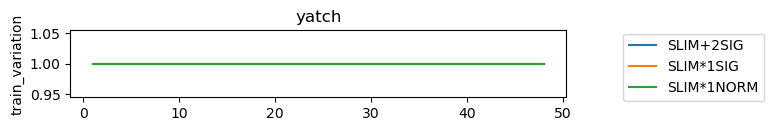

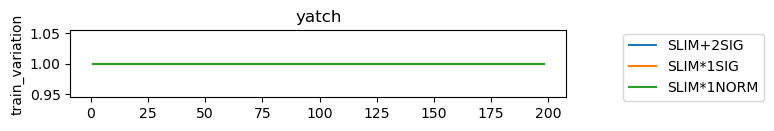

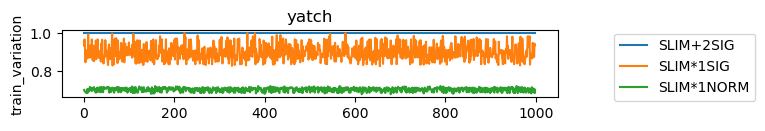

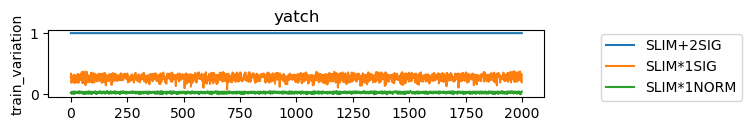

airfoil


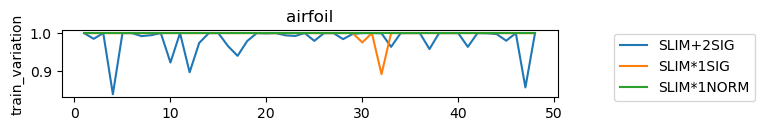

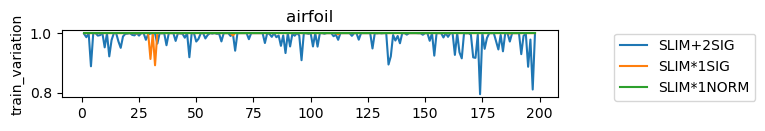

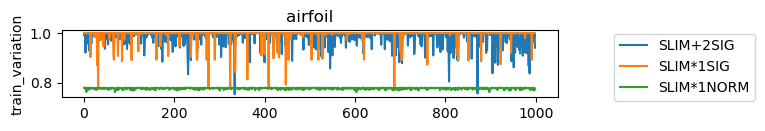

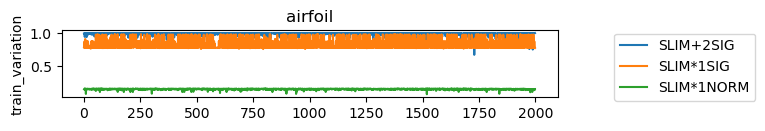

concrete_slump


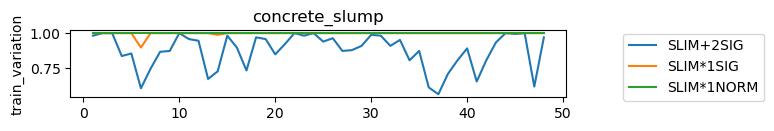

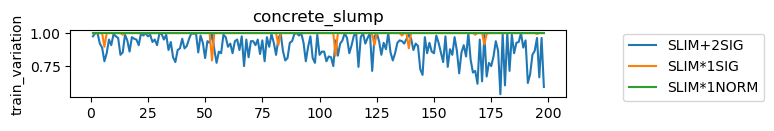

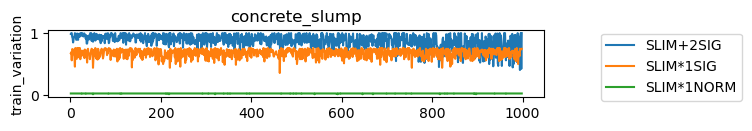

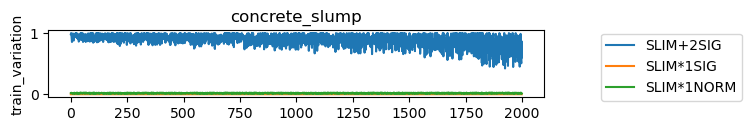

concrete_strength


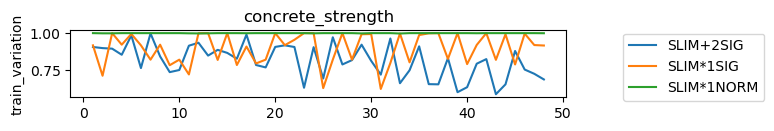

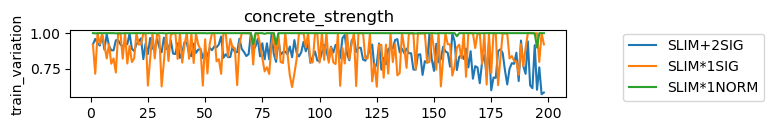

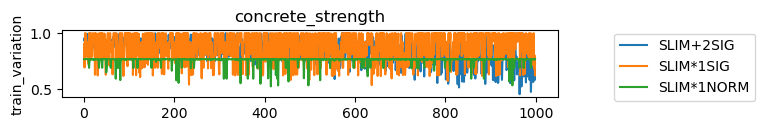

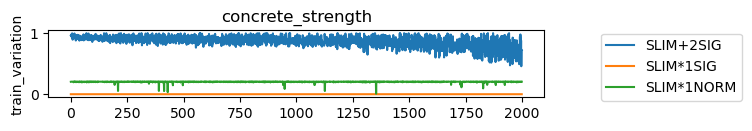

ppb


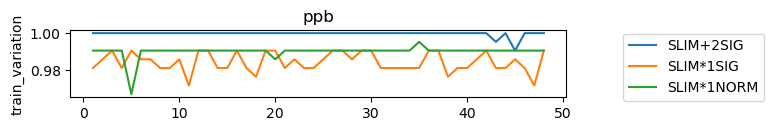

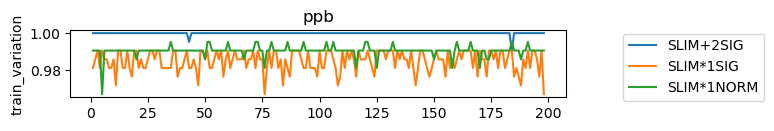

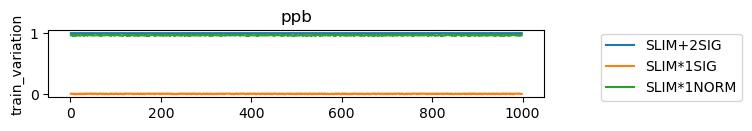

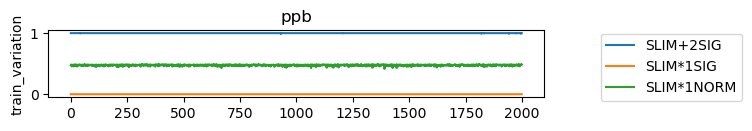

bioav


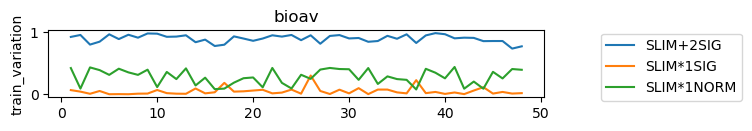

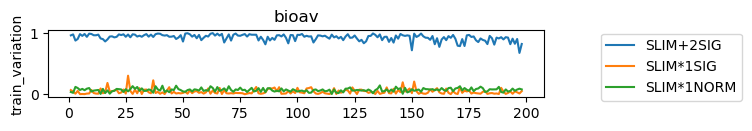

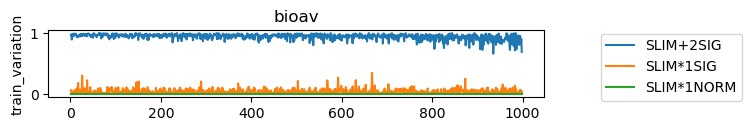

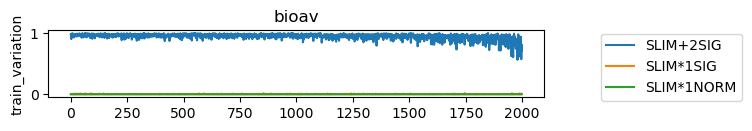

ld50


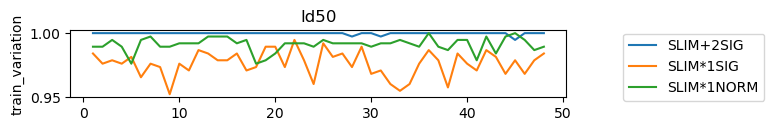

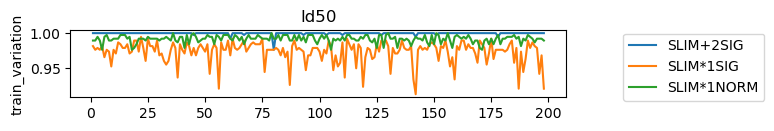

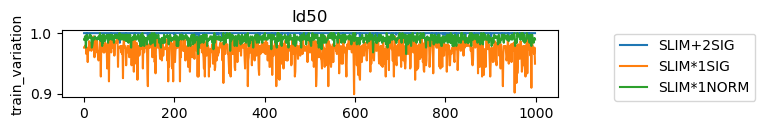

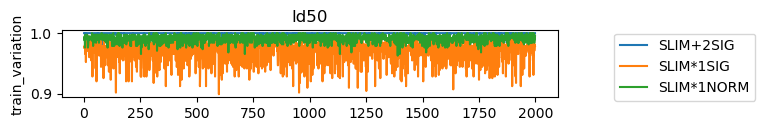

In [21]:
for ds in data.dataset.unique():
    print(ds)
    gs = gridspec.GridSpec(4, 1)
    gs.update( wspace=0.6, hspace =  0.5)
    for i, base_size in enumerate(data.query("operator == 'deflate'")['size'].unique()):
        ax = pl.subplot(gs[i, 0]) 
        for algo in data.algorithm.unique():
            grouped = data.query("dataset == @ds and algorithm == @algo and operator == 'deflate' and size == @base_size ")[[
                'operation_index', 'train_variation', 'train_similarity', 'train_distance']].groupby(
                ['operation_index']).median()
            grouped.reset_index(inplace = True)
            plt.plot(grouped.operation_index.values, grouped['train_variation'], label = algo)
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.ylabel('train_variation')
        plt.title(ds)
        plt.show()

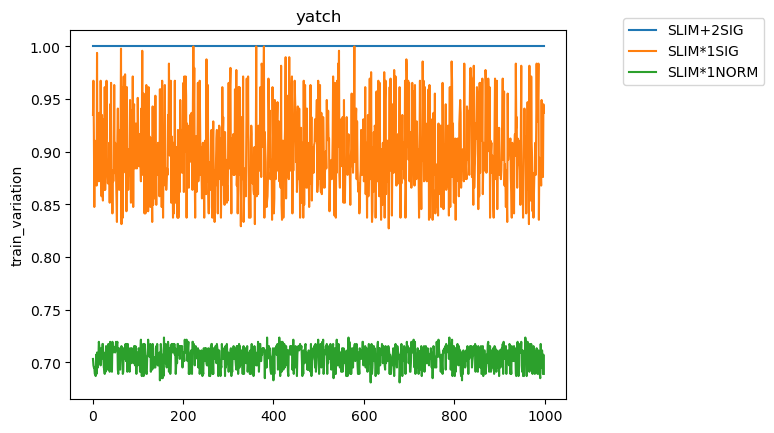

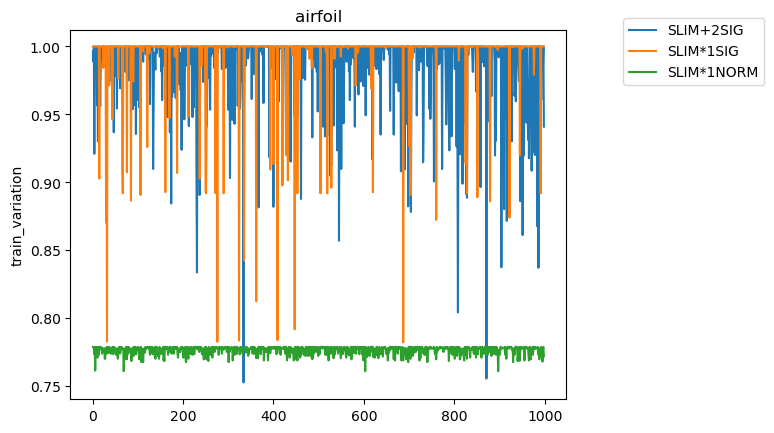

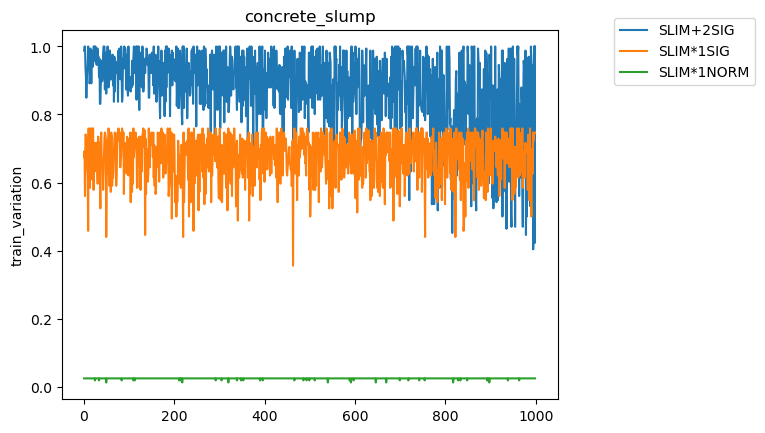

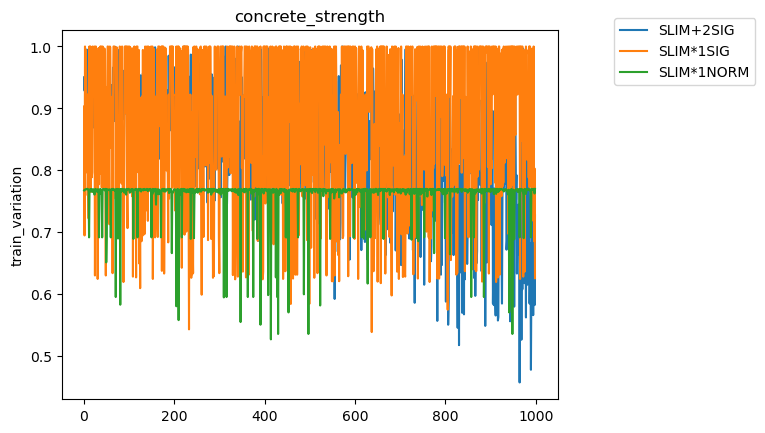

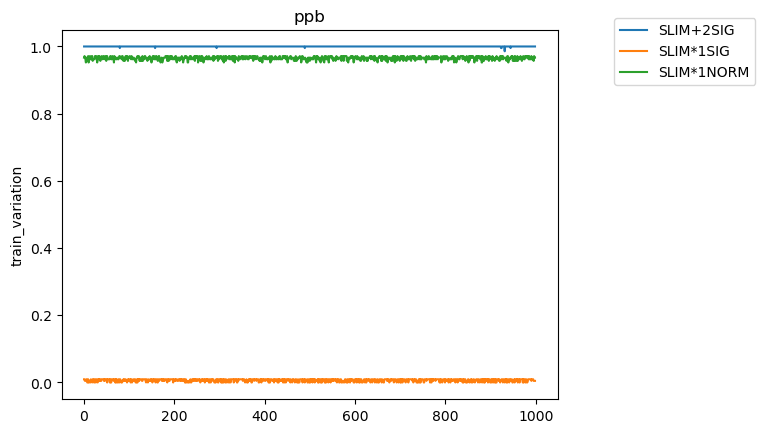

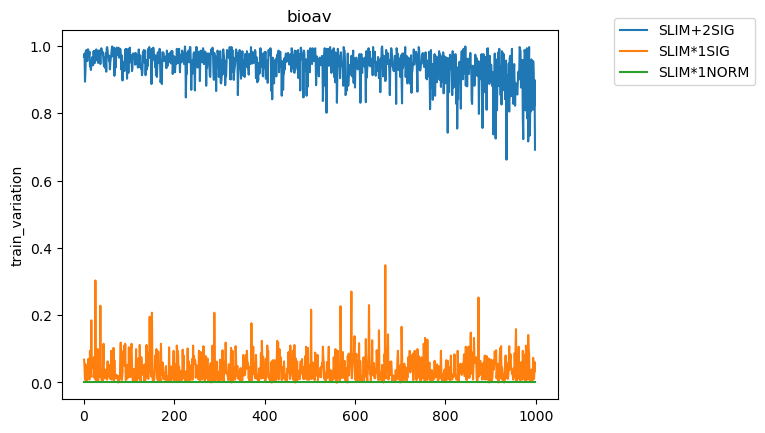

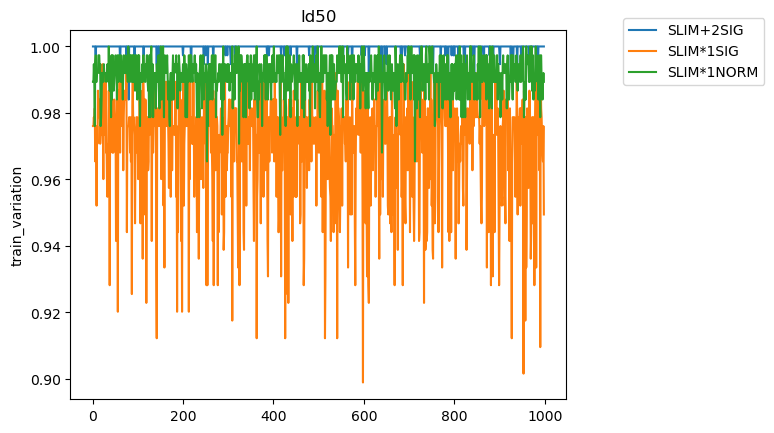

In [17]:
for ds in data.dataset.unique():
    # print(ds)
    # gs = gridspec.GridSpec(3, 1)
    # gs.update( wspace=0.6, hspace =  0.5)
    # for i, metric in enumerate(['train_variation', 'train_similarity', 'train_distance']):
    # ax = pl.subplot(gs[i, 0]) 
    for algo in data.algorithm.unique():
        grouped = data.query("dataset == @ds and algorithm == @algo and operator == 'deflate' and size == 999 ")[[
            'operation_index', 'train_variation', 'train_similarity', 'train_distance']].groupby(
            ['operation_index']).median()
        grouped.reset_index(inplace = True)
        plt.plot(grouped.operation_index.values, grouped['train_variation'], label = algo)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.ylabel('train_variation')
    plt.title(ds)
    plt.show()

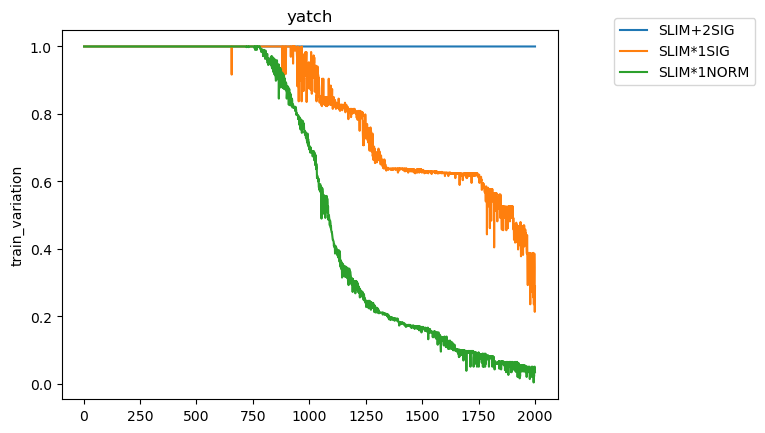

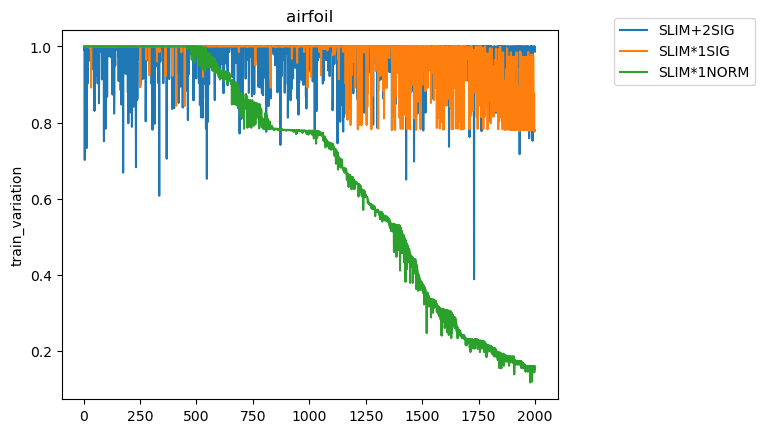

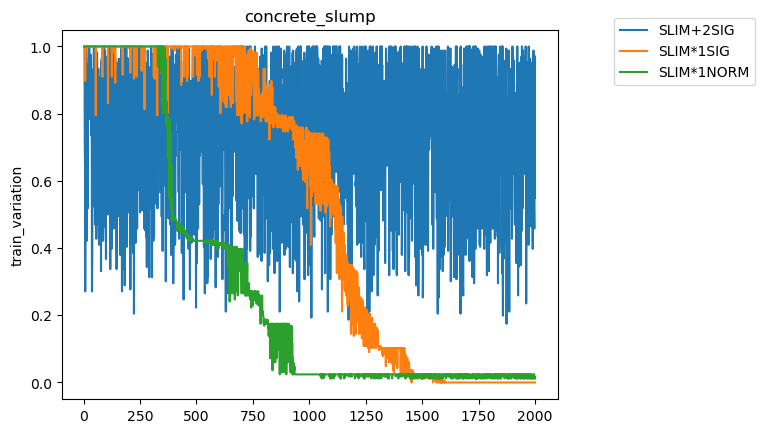

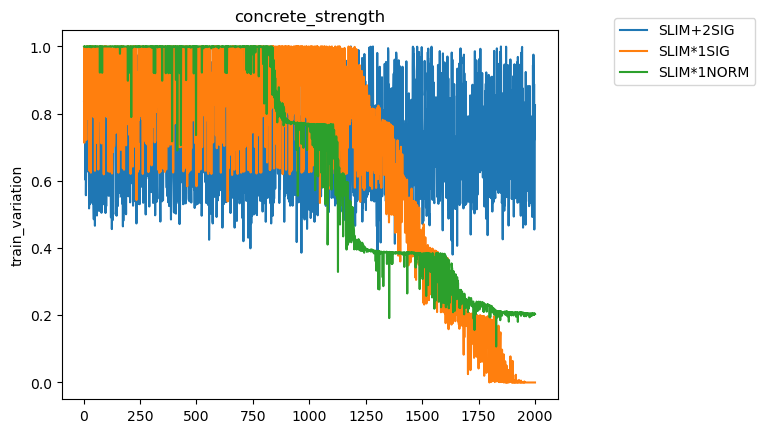

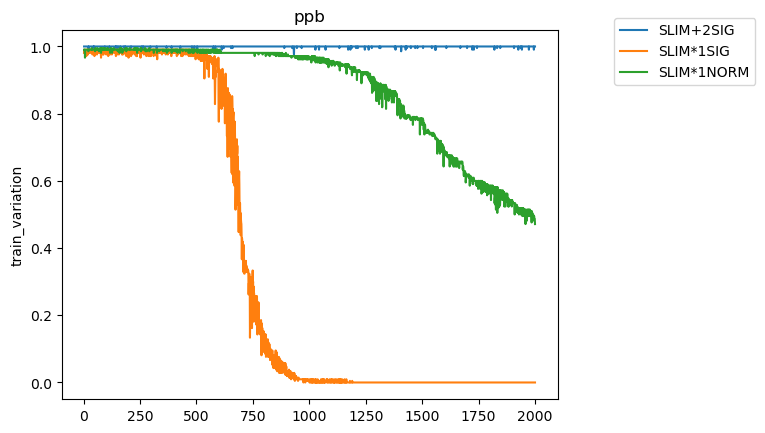

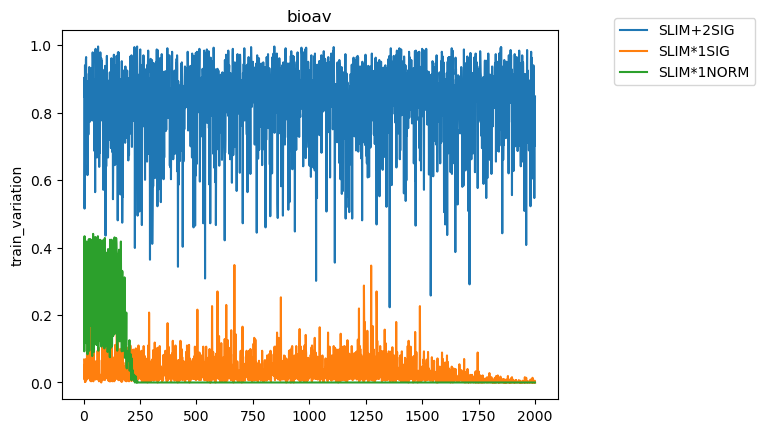

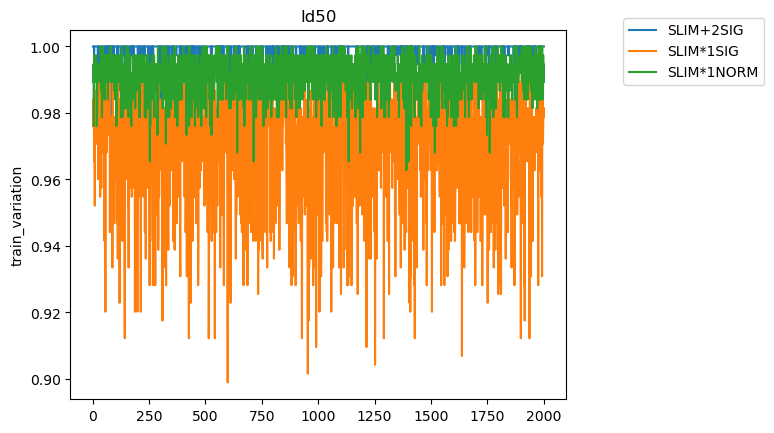

In [10]:
for ds in data.dataset.unique():
    
    # gs = gridspec.GridSpec(3, 1)
    # gs.update( wspace=0.6, hspace =  0.5)
    # for i, metric in enumerate(['train_variation', 'train_similarity', 'train_distance']):
    # ax = pl.subplot(gs[i, 0]) 
    for algo in data.algorithm.unique():
        grouped = data.query("dataset == @ds and algorithm == @algo and operator == 'inflate' ")[[
            'size', 'train_variation', 'train_similarity', 'train_distance']].groupby(
            ['size']).median()
        grouped.reset_index(inplace = True)
        plt.plot(grouped['size'].values, grouped['train_variation'], label = algo)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.ylabel('train_variation')
    plt.title(ds)
    plt.show()